In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import random
from scipy.cluster.hierarchy import linkage,dendrogram
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet
from sklearn.cluster import AgglomerativeClustering

In [244]:
airlines=pd.read_excel("A:/Data Science/assignments/Clustering/EastWestAirlines.xlsx",sheet_name='data')

In [99]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [101]:
airlines1.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [245]:
airlines1=airlines.iloc[:,1:]

In [246]:
airlines1=airlines1.iloc[1:100,:]

In [107]:
airlines1.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [247]:
airlines1.shape

(99, 11)

In [248]:
airlines1.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [243]:
airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust1,Clusters
1721,184805,0,4,1,1,52755,22,0,0,4726,1,NaN,NaN
998,192046,0,4,1,1,54818,52,1200,3,5829,0,NaN,NaN
1297,82380,0,1,1,1,2601,13,0,0,5071,0,NaN,NaN
2125,37358,0,4,1,1,50488,19,0,0,3967,1,NaN,NaN
1343,33057,763,1,1,1,5190,5,0,0,4828,0,NaN,NaN


In [110]:
airlines1.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,100.000000,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,68561.520000,301.980000,2.060000,1.0,1.0,15894.570000,11.920000,550.360000,1.740000,4029.960000,0.360000
std,75236.301575,1133.966445,1.331969,0.0,0.0,20767.638502,9.292856,1366.960194,4.314926,2107.291698,0.482418
min,1054.000000,0.000000,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,21284.000000,0.000000,1.000000,1.0,1.0,1437.500000,5.000000,0.000000,0.000000,2089.500000,0.000000
50%,46132.500000,0.000000,1.000000,1.0,1.0,6614.000000,12.000000,0.000000,0.000000,4216.500000,0.000000
75%,79873.000000,0.000000,3.000000,1.0,1.0,22252.250000,17.000000,462.500000,1.000000,5830.500000,1.000000
max,472241.000000,7558.000000,5.000000,1.0,1.0,103935.000000,52.000000,9000.000000,28.000000,8289.000000,1.000000


In [133]:
z=airlines1.Balance.value_counts()

In [30]:
airlines1.Balance.max()

1704838

In [249]:
airlines1=airlines1.rename({'Award?':'Award'},axis=1)

In [250]:
airlines1.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

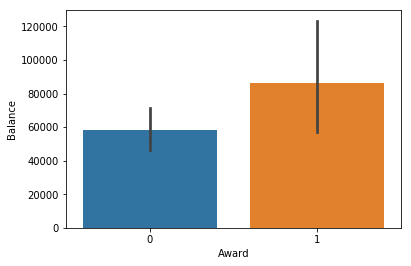

In [114]:
sns.barplot(airlines1.Award,airlines1.Balance)

In [251]:
airlines1.Award.value_counts()

0    57
1    42
Name: Award, dtype: int64

In [252]:
scaled=StandardScaler()
scaled_data=scaled.fit_transform(airlines1)
scaled_data=pd.DataFrame(scaled_data,columns=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'])

In [253]:
scaled_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.609926,-0.156742,-0.844406,-0.101015,0.0,-0.865299,-1.060124,-0.500879,-0.461139,-0.479574,-0.858395
1,-0.421584,-0.156742,-0.844406,-0.101015,0.0,-0.669899,-0.856728,-0.500879,-0.461139,-0.336176,-0.858395
2,-0.647986,-0.156742,-0.844406,-0.101015,0.0,-0.851049,-1.161822,-0.500879,-0.461139,-0.514337,-0.858395
3,0.058837,-0.156742,1.414950,-0.101015,0.0,1.288956,1.380626,1.320092,0.542219,-0.551273,1.164965
4,-0.633982,-0.156742,-0.844406,-0.101015,0.0,-0.876049,-1.263520,-0.500879,-0.461139,-0.536064,-0.858395


In [254]:
dist1=linkage(scaled_data,method='complete',metric='euclidean')#Complete+Euclidean

In [179]:
dist2=linkage(scaled_data,method='average',metric='euclidean')

In [255]:
c,cop1=cophenet(dist1,pdist(airlines1))
c

0.3545510586114421

In [129]:
c,cop1=cophenet(dist2,pdist(scaled_data))
c

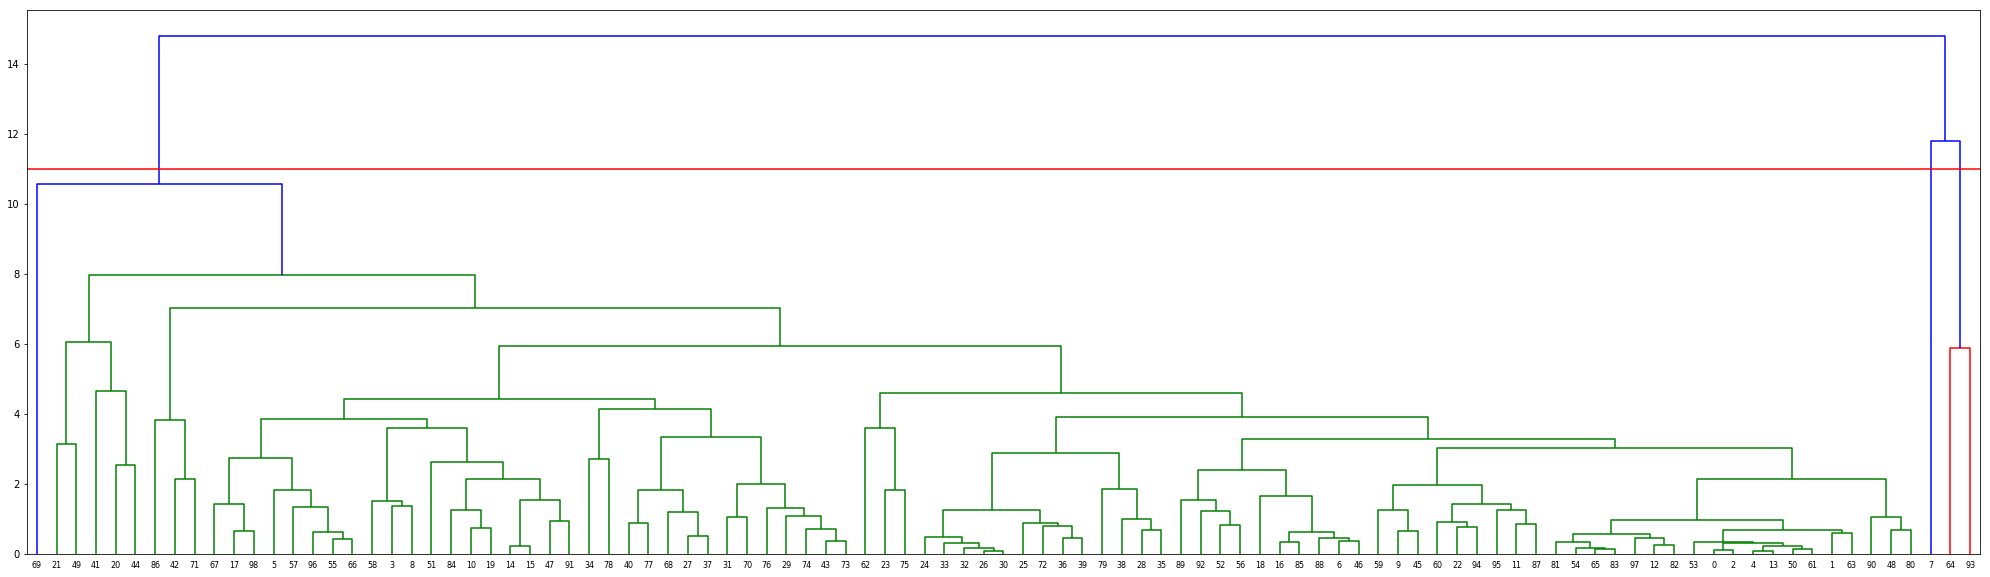

In [259]:
plt.figure(figsize=(35,10))
sch.dendrogram(dist1,leaf_rotation=0.,leaf_font_size=8.)
plt.axhline(y=11,color='red')

In [260]:
h1_complte=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean').fit(scaled_data)

In [261]:
Clusters=pd.Series(h1_complte.labels_)
Clusters

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     2
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
69    0
70    0
71    0
72    0
73    0
74    0
75    0
76    0
77    0
78    0
79    0
80    0
81    0
82    0
83    0
84    0
85    0
86    0
87    0
88    0
89    0
90    0
91    0
92    0
93    1
94    0
95    0
96    0
97    0
98    0
Length: 99, dtype: int64

In [262]:
airlines1['Clusters']=Clusters


In [263]:
airlines1=airlines1.iloc

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award', 'Clusters'],
      dtype='object')

In [264]:
airlines1['Clusters'].value_counts()

0.0    95
1.0     2
2.0     1
Name: Clusters, dtype: int64

In [265]:
airlines1.groupby(Clusters).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0.0,91412.147368,89.705263,2.147368,1.010526,1.0,17928.884211,12.694737,576.936842,1.873684,7203.768421,0.410526,0.0
1.0,111908.000000,0.000000,1.000000,1.000000,1.0,2947.500000,3.500000,750.000000,1.500000,6809.000000,0.500000,1.0
2.0,20856.000000,0.000000,1.000000,1.000000,1.0,5250.000000,4.000000,250.000000,1.000000,6938.000000,1.000000,2.0


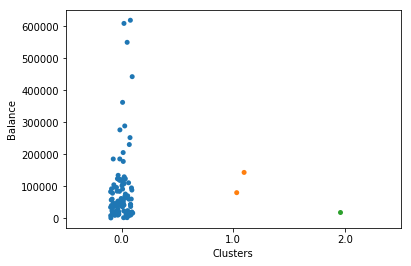

In [283]:
sns.stripplot(airlines1.Clusters,airlines1.Balance)

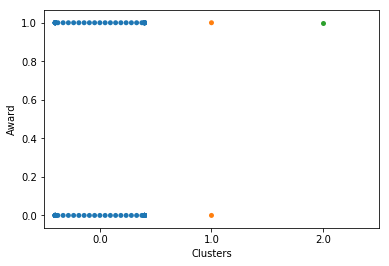

In [281]:
sns.swarmplot(airlines1.Clusters,airlines1.Award)

In [268]:
airlines1.Award.value_counts()

0    57
1    42
Name: Award, dtype: int64

In [274]:
airlines1[airlines1['Clusters']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
7,20856,0,1,1,1,5250,4,250,1,6938,1,2.0


In [ ]:
#Cluster 0 has more values than Cluster 1 and Cluster 2
#Most of the passenger are in Cluster 0 and most of them have balance o to 105k and Cluster 0 has balance outliers too